In [66]:
import pandas as pd
import numpy as np
import seaborn as sb
import random as rd
import matplotlib.pyplot as plt
import collections
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_absolute_error,mean_squared_error,r2_score,make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,cross_validate
from sklearn.base import clone
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
training = pd.read_csv("training.csv")
testing = pd.read_csv("testing.csv")

In [3]:
df = training.append(testing)

In [4]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,...,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,0.0
mean,0.138049,0.160016,0.021967,0.045143,0.021967,0.162233,0.139057,0.045143,0.045143,0.021967,...,0.021967,0.021967,0.023378,0.023176,0.023176,0.023176,0.023176,0.023378,0.023176,NaN
std,0.344986,0.366658,0.146590,0.207639,0.146590,0.368702,0.346041,0.207639,0.207639,0.146590,...,0.146590,0.146590,0.151115,0.150478,0.150478,0.150478,0.150478,0.151115,0.150478,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4962 entries, 0 to 41
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.1+ MB


In [7]:
print(df.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)


In [8]:
#training_shuffle.drop("Difficulty_Score", axis=1, inplace=True)

<BarContainer object of 131 artists>

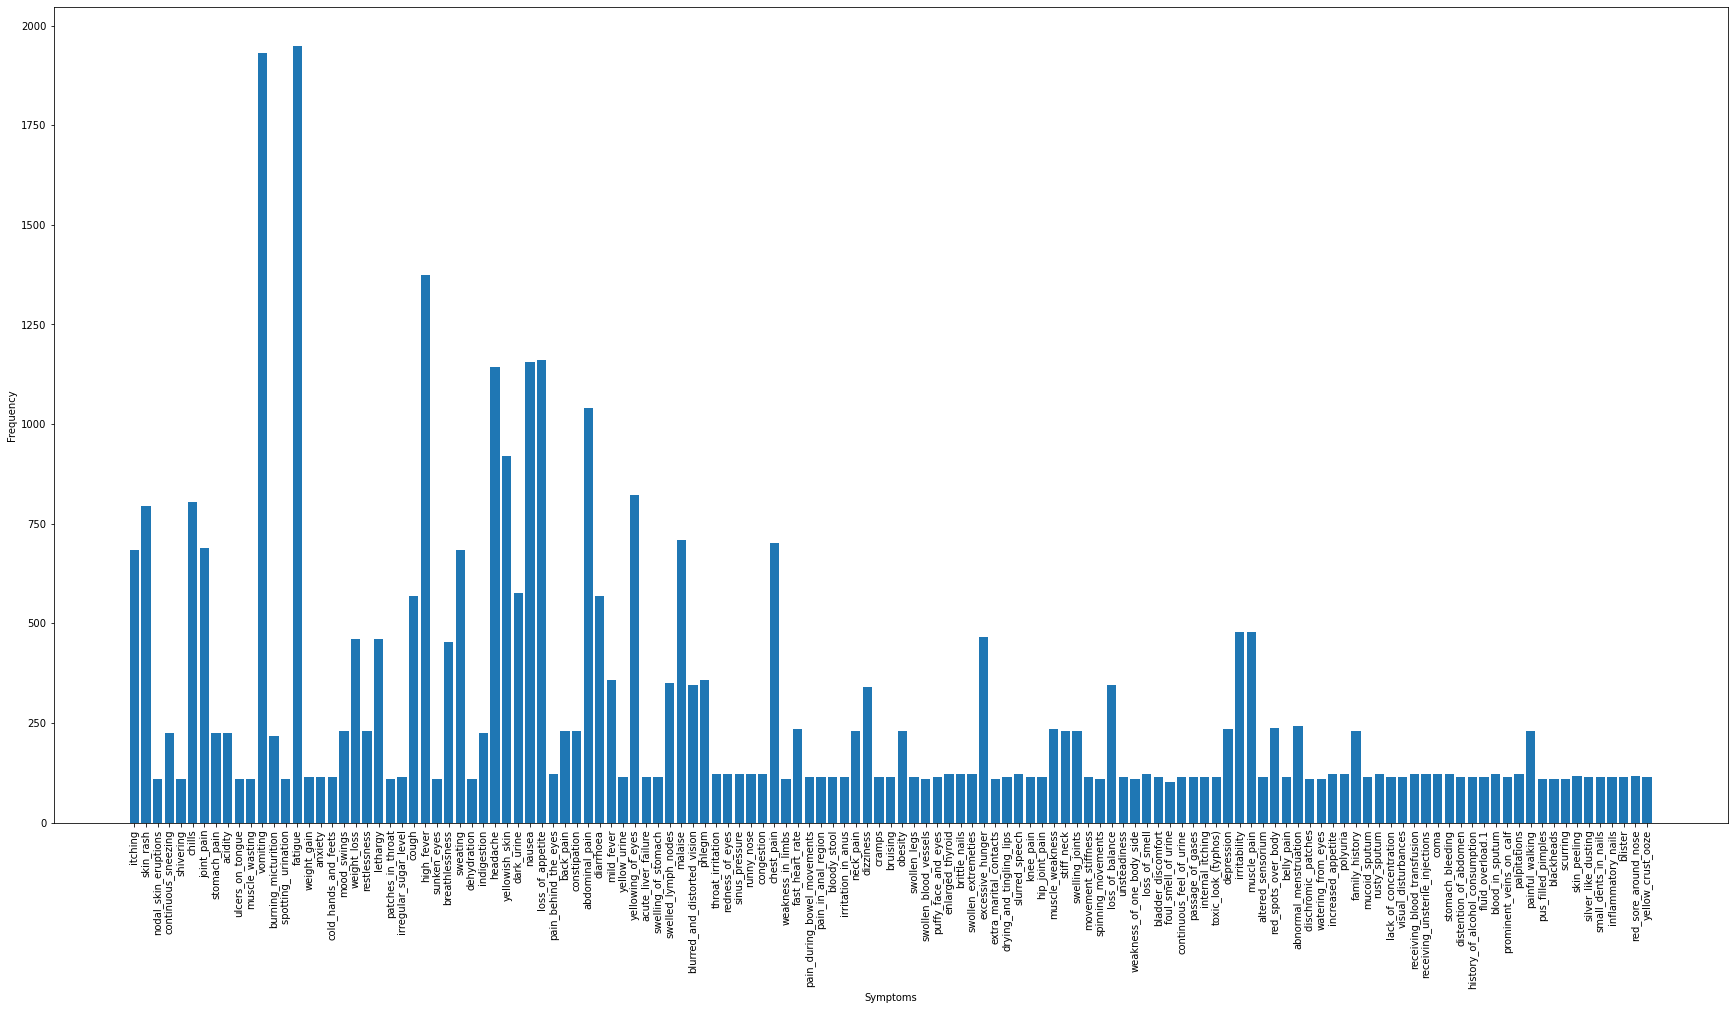

In [9]:
df.drop('Unnamed: 133', axis = 1, inplace=True)
df.drop('fluid_overload', axis = 1, inplace=True) #Unused Variable
df.isnull().sum()

x = df.drop('prognosis',axis=1)
y = df['prognosis']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

l = []
sym = list(df.drop('prognosis',axis=1))
arr = np.array(sym)
arr2 = np.array(l)
plt.figure(figsize = (30,15))
for j in sym:
    h = df[j].value_counts().values
    arr2 = np.append(arr2,h[1])
plt.xticks(rotation = 90)
plt.xlabel("Symptoms")
plt.ylabel("Frequency")
plt.bar(arr,arr2)

In [10]:
df_shuffle = shuffle(training)

In [11]:
df_shuffle.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Paralysis (brain hemorrhage),NaN
953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Paralysis (brain hemorrhage),NaN
4839,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Allergy,NaN
2489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Heart attack,NaN
3358,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN


In [12]:
xtrain.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
2896,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2194,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2567,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2543,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,1,0,0,0


In [13]:
xtest.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3947,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
xtrain.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,...,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000
mean,0.138070,0.159738,0.022424,0.044596,0.020912,0.161250,0.138826,0.046359,0.047115,0.022928,...,0.021164,0.021668,0.021416,0.022676,0.022424,0.022928,0.022676,0.023432,0.024187,0.023432
std,0.345017,0.366409,0.148076,0.206440,0.143108,0.367807,0.345808,0.210288,0.211912,0.149692,...,0.143949,0.145615,0.144785,0.148886,0.148076,0.149692,0.148886,0.151289,0.153650,0.151289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
xtest.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,...,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,0.137966,0.161128,0.020141,0.047331,0.026183,0.166163,0.139980,0.040282,0.037261,0.018127,...,0.025176,0.023162,0.024169,0.026183,0.026183,0.024169,0.025176,0.022155,0.020141,0.022155
std,0.345038,0.367834,0.140553,0.212454,0.159761,0.372415,0.347141,0.196719,0.189496,0.133478,...,0.156739,0.150494,0.153652,0.159761,0.159761,0.153652,0.156739,0.147262,0.140553,0.147262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
GNB = GaussianNB()
pred = GNB.fit(xtrain, ytrain).predict(xtest)
GNB_score = GNB.score(xtest, ytest)
print(f"GNB Accuracy from library: {GNB_score * 100}%")

GNB Accuracy from library: 100.0%


In [17]:
DT = DecisionTreeClassifier()
pred = DT.fit(xtrain, ytrain).predict(xtest)
DT_score = DT.score(xtest, ytest)
print(f"DT Accuracy from library: {DT_score * 100}%")

DT Accuracy from library: 100.0%


In [18]:
RF = RandomForestClassifier()
pred = RF.fit(xtrain, ytrain).predict(xtest)
RF_score = RF.score(xtest, ytest)
print(f"RF Accuracy from library: {RF_score * 100}%")

RF Accuracy from library: 100.0%


In [19]:
example = {}
for i in range(131):
    example[i] = [rd.randint(0, 1), rd.randint(0, 1), rd.randint(0, 1), rd.randint(0, 1)]
exampledf = pd.DataFrame(example)

In [20]:
exampledf

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,1,1,1,0
1,1,0,1,1,0,1,1,1,1,1,...,0,1,1,1,1,0,1,0,1,1
2,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,1,1
3,0,1,1,0,1,0,1,1,1,1,...,1,1,1,0,0,1,1,1,1,0


In [21]:
predgnb = GNB.fit(xtrain, ytrain).predict(exampledf)
preddt = DT.fit(xtrain, ytrain).predict(exampledf)
predrf = RF.fit(xtrain, ytrain).predict(exampledf)
print(f"GNB: {predgnb},\nDT: {preddt},\nRF: {predrf}.")

GNB: ['Hepatitis E' 'Hypoglycemia' 'Common Cold' 'Hepatitis B'],
DT: ['Hepatitis E' 'Hepatitis E' 'Pneumonia' 'Hepatitis E'],
RF: ['Hepatitis E' 'Hepatitis E' 'Hypothyroidism'
 'Dimorphic hemmorhoids(piles)'].


In [22]:
class NaiveBayesClassifier():
    '''
    Bayes Theorem form
    P(y|X) = P(X|y) * P(y) / P(X)
    '''
    def calc_prior(self, features, target):
        '''
        prior probability P(y)
        calculate prior probabilities
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def calc_statistics(self, features, target):
        '''
        calculate mean, variance for each column and convert to numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        '''
        calculate probability from gaussian density function (normally distributed)
        we will assume that probability of specific target value given specific class is normally distributed 
        
        probability density function derived from wikipedia:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance (standard deviation)
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        
#         if var == 0 or np.isnan(np.var):
#             var = 0.0000000000000000000000001
        for i in range(len(var)):
             if var[i] == 0 or np.isnan(var[i]):
                var[i] = 0.0000000000001
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        # numerator = np.exp(-((x-mean)**2 / (2 * var)))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

    def visualize(self, y_true, y_pred, target):
        
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
        
        sns.countplot(x=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)
        

        fig.suptitle('True vs Predicted Comparison', fontsize=20)

        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        plt.show()

In [23]:
Bayes = NaiveBayesClassifier()

Bayes.fit(xtrain, ytrain)

In [24]:
predBayes = Bayes.predict(xtest)

C:\Users\Antek\AppData\Local\Temp/ipykernel_6156/3913540780.py:52: RuntimeWarning: divide by zero encountered in log
  conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable


In [25]:
GNB_self_score = Bayes.accuracy(ytest, predBayes)
print(GNB_self_score)

1.0


In [26]:
dfunique = df.drop_duplicates()

In [27]:
dfunique.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.00000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,0.137705,0.140984,0.013115,0.039344,0.013115,0.173770,0.150820,0.036066,0.04918,0.019672,...,0.013115,0.013115,0.013115,0.022951,0.019672,0.019672,0.019672,0.016393,0.019672,0.016393
std,0.345156,0.348577,0.113953,0.194732,0.113953,0.379535,0.358461,0.186760,0.21660,0.139099,...,0.113953,0.113953,0.113953,0.149993,0.139099,0.139099,0.139099,0.127192,0.139099,0.127192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
dfunique[dfunique.duplicated(keep =False)]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis


In [29]:
dfunique_shuffle = shuffle(dfunique)

xu = dfunique.drop('prognosis',axis=1)
yu = dfunique['prognosis']

xtrain_new, xtest_new, ytrain_new, ytest_new = train_test_split(xu, yu, test_size = 0.2)

In [30]:
pred_new = RF.fit(xtrain_new, ytrain_new).predict(xtest_new)
RF_score_new = RF.score(xtest_new, ytest_new)
print(f"RF Accuracy from library: {RF_score_new * 100}%")

pred_new = DT.fit(xtrain_new, ytrain_new).predict(xtest_new)
DT_score_new = DT.score(xtest_new, ytest_new)
print(f"DT Accuracy from library: {DT_score_new * 100}%")

pred_new = GNB.fit(xtrain_new, ytrain_new).predict(xtest_new)
GNB_score_new = GNB.score(xtest_new, ytest_new)
print(f"GNB Accuracy from library: {GNB_score_new * 100}%")

RF Accuracy from library: 100.0%
DT Accuracy from library: 62.295081967213115%
GNB Accuracy from library: 98.36065573770492%


In [31]:
predgnb_new = GNB.fit(xtrain_new, ytrain_new).predict(exampledf)
preddt_new = DT.fit(xtrain_new, ytrain_new).predict(exampledf)
predrf_new = RF.fit(xtrain_new, ytrain_new).predict(exampledf)
print(f"GNB: {predgnb_new},\nDT: {preddt_new},\nRF: {predrf_new}.")

GNB: ['Hepatitis E' 'Hepatitis E' 'Common Cold' 'Fungal infection'],
DT: ['Hepatitis E' 'Hepatitis E' 'Hepatitis E' 'Fungal infection'],
RF: ['Hepatitis E' 'Hepatitis E' 'Varicose veins' 'Hepatitis B'].


In [32]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

In [33]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=3, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        best_split ={}
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        print(num_samples)
        print(num_features)
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
           
        if  best_split:
            if best_split["info_gain"]>0:  
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
              
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
    
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="gini"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
     
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [34]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [35]:
classifier = DecisionTreeClassifier(min_samples_split=1, max_depth=40)

classifier.fit(X_train,Y_train)
#classifier.print_tree()

3969
131
3868
131
3768
131
3669
131
3570
131
3374
131
3276
131
3179
131
2983
131
2887
131
2600
131
2504
131
2409
131
2305
131
2211
131
2116
131
2022
131
1833
131
1739
131
1646
131
1553
131
1460
131
1368
131
1276
131
1184
131
1088
131
1000
131
902
131
808
131
723
131
627
131
533
131
431
131
349
131
266
131
184
131
109
131
99
131
90
131
81
131
72
131
64
131
8
131
9
131
9
131
9
131
10
131
75
131
82
131
83
131
82
131
102
131
92
131
10
131
5
131
5
131
94
131
90
131
4
131
96
131
90
131
6
131
85
131
94
131
90
131
4
131
98
131
93
131
5
131
88
131
96
131
92
131
4
131
92
131
92
131
92
131
93
131
93
131
93
131
94
131
189
131
93
131
96
131
94
131
95
131
94
131
104
131
99
131
5
131
95
131
96
131
287
131
190
131
104
131
86
131
97
131
96
131
196
131
103
131
99
131
98
131
1
131
4
131
93
131
97
131
98
131
196
131
102
131
94
131
99
131
99
131
100
131
101
131


In [36]:
Y_pred = classifier.predict(X_test) 
from sklearn.metrics import accuracy_score
DT_self_score = accuracy_score(Y_test, Y_pred)
print(DT_self_score)

0.973816717019134


In [53]:
from abc import ABC,abstractmethod
#base class for the random forest algorithm
class RandomForest(ABC):
    #initializer
    def __init__(self,n_trees=100):
        self.n_trees = n_trees
        self.trees   = []
            #private function to make bootstrap samples
    def __make_bootstraps(self,data):
        #initialize output dictionary & unique value count
        dc   = {}
        unip = 0
        #get sample size
        b_size = data.shape[0]
        #get list of row indexes
        idx = [i for i in range(b_size)]
        #loop through the required number of bootstraps
        for b in range(self.n_trees):
            #obtain boostrap samples with replacement
            sidx   = np.random.choice(idx,replace=True,size=b_size)
            b_samp = data[sidx,:]
            #compute number of unique values contained in the bootstrap sample
            unip  += len(set(sidx))
            #obtain out-of-bag samples for the current b
            oidx   = list(set(idx) - set(sidx))
            o_samp = np.array([])
            if oidx:
                o_samp = data[oidx,:]
            #store results
            dc['boot_'+str(b)] = {'boot':b_samp,'test':o_samp}
        #return the bootstrap results
        return(dc)
    
        #public function to return model parameters
    def get_params(self, deep = False):
        return {'n_trees':self.n_trees}

    #protected function to obtain the right decision tree
    @abstractmethod
    def _make_tree_model(self):
        pass
    
        #protected function to train the ensemble
    def _train(self,X_train,y_train):
        #package the input data
        training_data = np.concatenate((X_train,y_train.reshape(-1,1)),axis=1)
        #make bootstrap samples
        dcBoot = self.__make_bootstraps(training_data)
        #iterate through each bootstrap sample & fit a model ##
        tree_m = self._make_tree_model()
        dcOob    = {}
        for b in dcBoot:
            #make a clone of the model
            model = clone(tree_m)
            #fit a decision tree model to the current sample
            model.fit(dcBoot[b]['boot'][:,:-1],dcBoot[b]['boot'][:,-1].reshape(-1, 1))
            #append the fitted model
            self.trees.append(model)
            #store the out-of-bag test set for the current bootstrap
            if dcBoot[b]['test'].size:
                dcOob[b] = dcBoot[b]['test']
            else:
                dcOob[b] = np.array([])
        #return the oob data set
        return(dcOob)
    
        #protected function to predict from the ensemble
    def _predict(self,X):
        #check we've fit the ensemble
        if not self.trees:
            print('You must train the ensemble before making predictions!')
            return(None)
        #loop through each fitted model
        predictions = []
        for m in self.trees:
            #make predictions on the input X
            yp = m.predict(X)
            #append predictions to storage list
            predictions.append(yp.reshape(-1,1))
        #compute the ensemble prediction
        ypred = np.mean(np.concatenate(predictions,axis=1),axis=1)
        #return the prediction
        return(ypred)

In [63]:
#class for random forest classifier
class RandomForestClassifier(RandomForest):
    #initializer
    def __init__(self,n_trees=100,max_depth=None,min_samples_split=2,loss='gini',balance_class_weights=False):
        super().__init__(n_trees)
        self.max_depth             = max_depth
        self.min_samples_split     = min_samples_split
        self.loss                  = loss
        self.balance_class_weights = balance_class_weights
                
        #protected function to obtain the right decision tree
    def _make_tree_model(self):
        return(DecisionTreeClassifier(max_depth             = self.max_depth,
                                      min_samples_split     = self.min_samples_split,
                                      #loss                  = self.loss,
                                      #balance_class_weights = self.balance_class_weights))
                                     ))
    
    #public function to return model parameters
    def get_params(self, deep = False):
        return {'n_trees':self.n_trees,
                'max_depth':self.max_depth,
                'min_samples_split':self.min_samples_split,
                #'loss':self.loss,
                #'balance_class_weights':self.balance_class_weights
               }
    
        #train the ensemble
    def fit(self,X_train,y_train,print_metrics=False):
        #call the protected training method
        dcOob = self._train(X_train,y_train)
        #if selected, compute the standard errors and print them
        if print_metrics:
            #initialise metric arrays
            accs = np.array([])
            pres = np.array([])
            recs = np.array([])
            #loop through each bootstrap sample
            for b,m in zip(dcOob,self.trees):
                #compute the predictions on the out-of-bag test set & compute metrics
                if dcOob[b].size:
                    yp  = m.predict(dcOob[b][:,:-1])
                    acc = accuracy_score(dcOob[b][:,-1],yp)
                    pre = precision_score(dcOob[b][:,-1],yp,average='weighted')   
                    rec = recall_score(dcOob[b][:,-1],yp,average='weighted')
                    #store the error metrics
                    accs = np.concatenate((accs,acc.flatten()))
                    pres = np.concatenate((pres,pre.flatten()))
                    recs = np.concatenate((recs,rec.flatten()))
            #print standard errors
            print("Standard error in accuracy: %.2f" % np.std(accs))
            print("Standard error in precision: %.2f" % np.std(pres))
            print("Standard error in recall: %.2f" % np.std(recs))
            
                #predict from the ensemble
    def predict(self,X):
        #call the protected prediction method
        ypred = self._predict(X)
        #convert the results into integer values & return
        return(np.round(ypred).astype(int))

In [64]:
sY = df.iloc[:,-1]
dfX = df.iloc[:,:-1]

In [67]:
rfc = RandomForestClassifier()
rfc.fit(dfX.values,sY.values)

RandomForestClassifier()

In [70]:
scoring_metrics = {'accuracy': make_scorer(accuracy_score)}
dcScores        = cross_validate(rfc,dfX.values,sY.values,cv=StratifiedKFold(10),scoring=scoring_metrics)
RF_self_score = np.mean(dcScores['test_accuracy'])
print(RF_self_score)

0.9997983870967742


In [71]:
results_lib = {'Gaussian Naive Bayes lib': GNB_score_new, 'Random Forest lib': RF_score_new, 'Decision Tree lib': DT_score_new}
methods = list(results_lib.keys())
accuracy_met = list(results_lib.values())

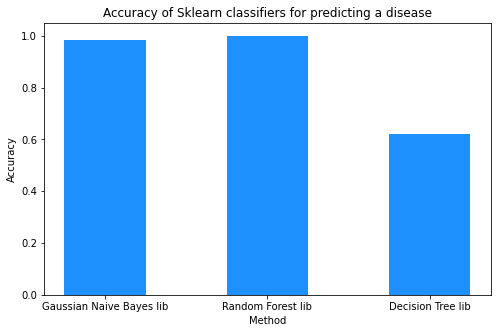

In [72]:
fig = plt.figure(figsize = (8, 5))
plt.bar(methods, accuracy_met, color = 'dodgerblue', width=0.5)
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Accuracy of Sklearn classifiers for predicting a disease')
plt.show()

In [73]:
results_self = {'Gaussian Naive Bayes': GNB_self_score, 'Decision Tree': DT_self_score, 'Random Forest': RF_self_score}
methods_self = list(results_self.keys())
accuracy_met_self = list(results_self.values())

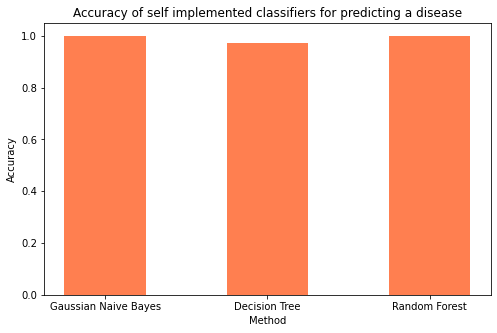

In [74]:
fig2 = plt.figure(figsize = (8, 5))
plt.bar(methods_self, accuracy_met_self, color = 'coral', width=0.5)
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Accuracy of self implemented classifiers for predicting a disease')
plt.show()

In [75]:
results = {**results_lib, **results_self}
results = collections.OrderedDict(sorted(results.items()))
methods = list(results.keys())
accuracy_met = list(results.values())

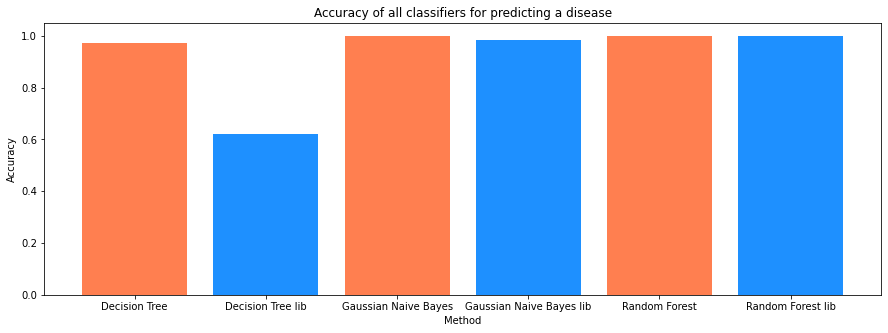

In [78]:
fig3 = plt.figure(figsize = (15, 5))
bar = plt.bar(methods, accuracy_met, color = ['coral', 'dodgerblue'])
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Accuracy of all classifiers for predicting a disease')
plt.show()

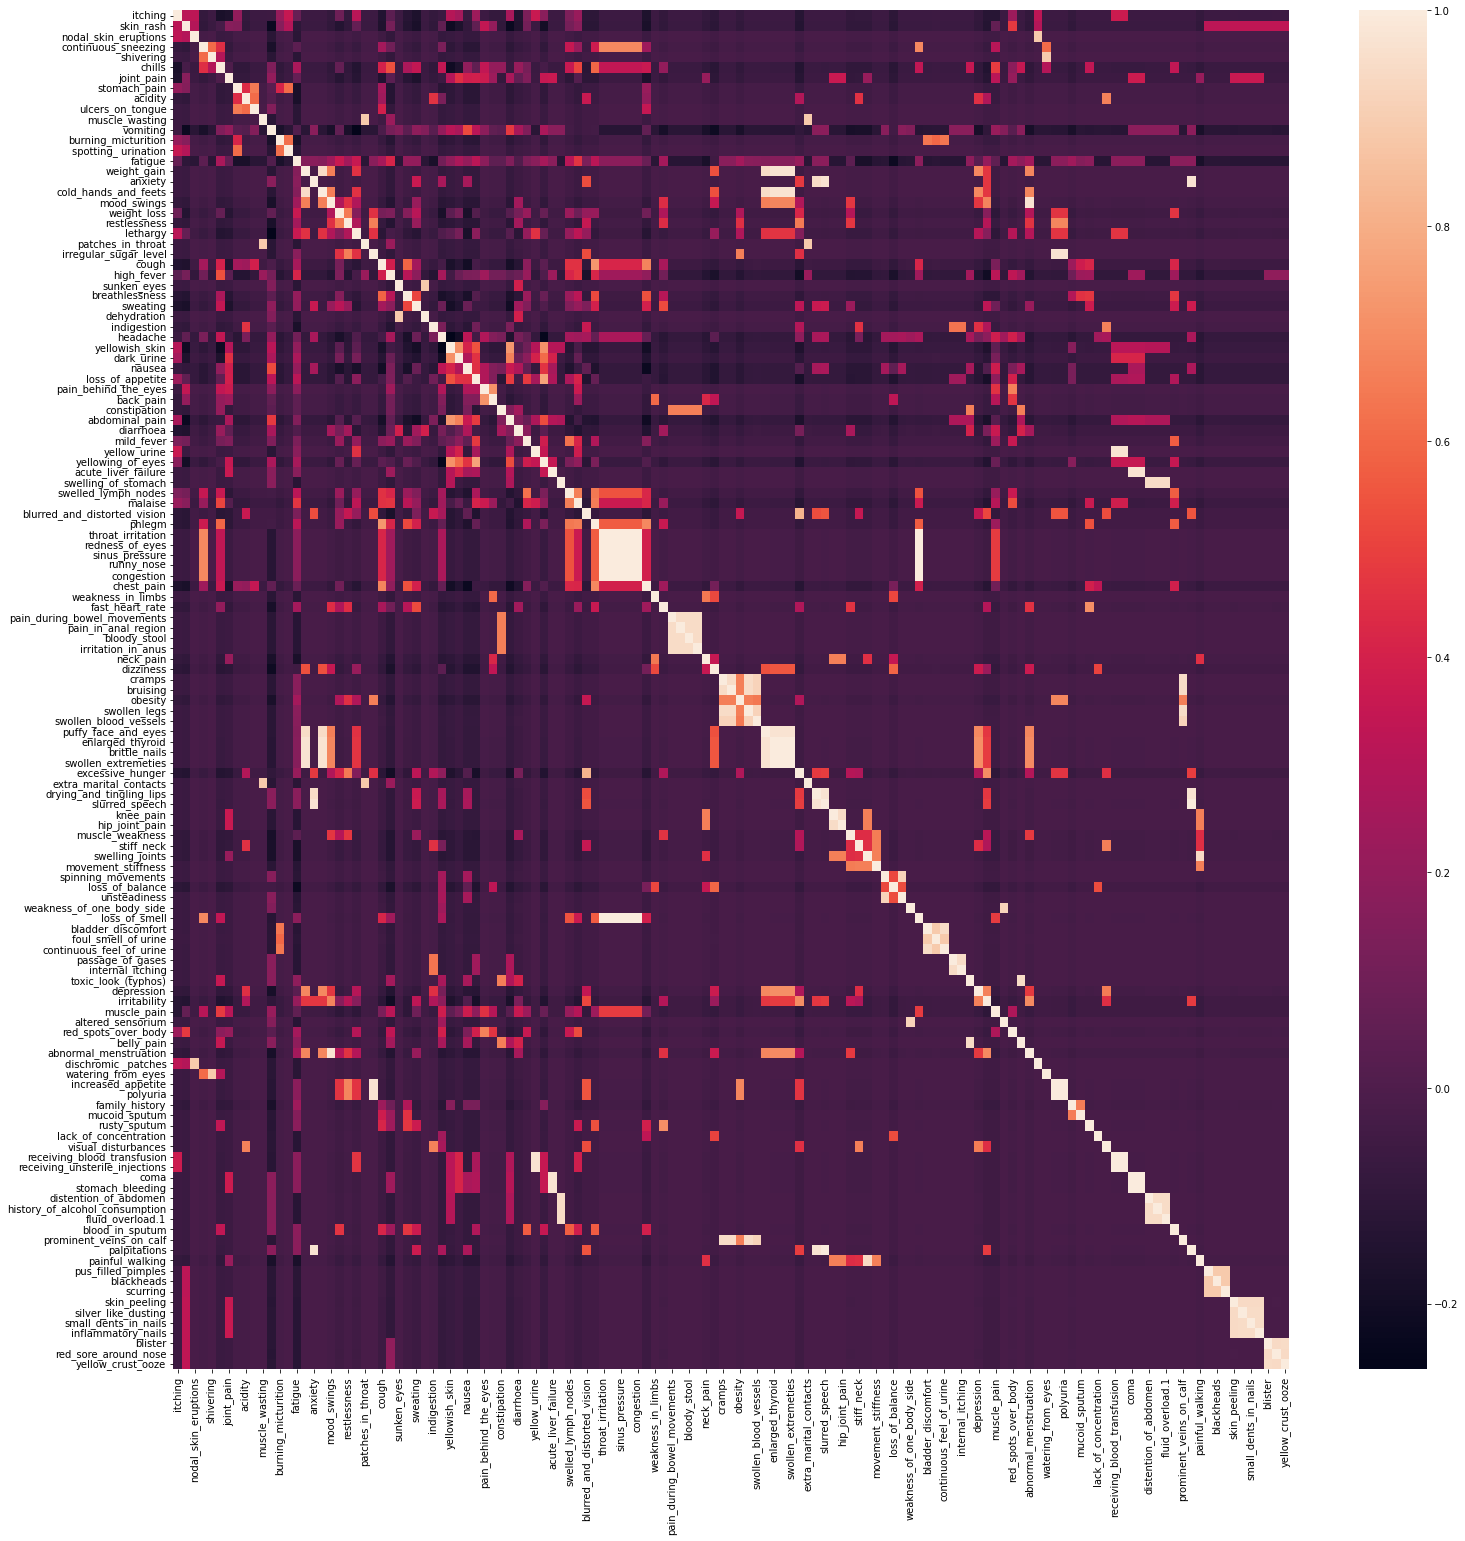

In [79]:
fig4 = plt.subplots(figsize = (25, 25))
dfCorr = dfX.corr()
sb.heatmap(dfCorr)
plt.show()